### *NOTE*
- this is a resubmission of my original project due to the fact that my code takes such a long time to run that I wasn't able to submit my project in time for the first deadline, and run the portion of the code that would give the graph legitimate data. I am resubmitting it now that I finally have time, and as you can see here, none of my code from the original submission has changed (apart from one global variable included in the graph section). I am aware that this is way past the deadline, but I was hoping that you would be willing to take this submission as a candidate for an on-time submission of the project, as the only reason I was unable to submit one originally is the run time of my code. Either way, thank you for your time.

# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World

Student Name: Rick Lattin

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [1]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [2]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'west'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a performance measure which is here the number of cleaned squares (since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room as required in the PEAS description above). The energy budget of the agent is specified as `max_steps`.

In [3]:
def simple_environment(agent, max_steps, verbose = True):
    num_cleaned = 0

    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action)

        if (action == "suck"):
            num_cleaned = num_cleaned + 1

    return num_cleaned



Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [4]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: north
step 1 - action: north
step 2 - action: south
step 3 - action: north
step 4 - action: suck
step 5 - action: north
step 6 - action: suck
step 7 - action: suck
step 8 - action: west
step 9 - action: north
step 10 - action: south
step 11 - action: north
step 12 - action: north
step 13 - action: east
step 14 - action: suck
step 15 - action: north
step 16 - action: north
step 17 - action: suck
step 18 - action: south
step 19 - action: south


5

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environmnt for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

##### The environment begins by creating a square grid the the size of the size varibale passed in, and then filling 20% of those squares with dirt that is to be cleaned and filling the num_dirty variable with the number of dirtied squares. The clean squares are denoted with 0's and the dirty ones 1's. It then assigns a random starting location to the agent calling a loop that calls the agent, which has been passed in as a variable, an indefinite amount of times. The environment updates the bumper and dirty information before calling the agent, and then depending on the return of the agent, the environment will either move the agent north, south, east, or west, while also possibly performing the suck action. If the square the agent is currently, which is information saved by the environment, and the suck action is called, then the 1 is turned to a 0 on the grid. For each square cleaned the num_dirty variable is decremented and for each call of the agent, the num_steps variable is incremented. The environment finishes running when the max steps is reached or if the num_dirty variable reaches 0.

In [5]:
# Your code and description goes here

reached_corner = False 
last_move = "north"

def vacuum_environment(agent, max_steps, size, verbose = True):
    num_steps = 0
    num_dirty = 0
    agent_start_location = (0,0)
    agent_location = (agent_start_location[0], agent_start_location[1])
    reached_corner = False

    #create the environment
    grid = np.zeros((size,size))
    for i in range(size):
        for j in range(size):
            if np.random.random() < 0.2:
                grid[i,j] = 1
                num_dirty += 1
    if verbose == True:
        print(grid)
    
    #make start point for agent
    x_start = np.random.randint(0,size)
    y_start = np.random.randint(0,size)
    agent_start_location = (x_start,y_start)
    agent_location = agent_start_location


    for i in range(max_steps):

        #send agent drity square information
        if grid[agent_location[0], agent_location[1]] == 1:
            dirty = True
        else:
            dirty = False
        
        #send agent bumpers information
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}
        if verbose == True:
            print(agent_location)
        if agent_location[0] == 0:
            bumpers["north"] = True
        if agent_location[0] == size-1:
            bumpers["south"] = True
        if agent_location[1] == 0:
            bumpers["west"] = True
        if agent_location[1] == size-1:
            bumpers["east"] = True

        #call agent action
        action = agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action)

        #making sure simple random doesn't break
        if action == "north" and bumpers["north"] == True:
            action = "none"
            num_steps += 1
        if action == "south" and bumpers["south"] == True:
            action = "none"
            num_steps += 1
        if action == "east" and bumpers["east"] == True:
            action = "none"
            num_steps += 1
        if action == "west" and bumpers["west"] == True:
            action = "none"
            num_steps += 1


        #counting the steps
        if (action == "north"):
            agent_location = (agent_location[0]-1,agent_location[1])
            num_steps += 1
        if (action == "east"):
            agent_location = (agent_location[0],agent_location[1]+1)
            num_steps += 1
        if (action == "west"):
            agent_location = (agent_location[0],agent_location[1]-1)
            num_steps += 1
        if (action == "south"):
            agent_location = (agent_location[0]+1,agent_location[1])
            num_steps += 1

        if (action == "suck"):
            if grid[agent_location[0], agent_location[1]] == 1:
                num_dirty = num_dirty - 1
            num_steps += 1 
            grid[agent_location[0], agent_location[1]] = 0

        if num_dirty == 0:
            break

    if verbose == True:
        print(grid)
    return num_steps

In [6]:
vacuum_environment(simple_randomized_agent, max_steps = 10000000, size = 100, verbose=False)

1013304

## Task 2:  Implement a simple reflex agent [10 Points]

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function.

##### This agent functionally works the same way as the simple randomized agent, with the only differences being that if the square the agent is on is seen to be dirty then the agent will automatically return the "suck" action and will refuse to return an action that is physically impossible based off of the bumpers. This streamlines the agent's cleaning process by allowing the agent to simply find the location of a dirty space in order to clean it. Furthermore, it prevents the agent from taking a move to attempt to move into a wall, which the simple randomized agent had the capacity to do.

In [7]:
# Your code and description goes here
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_reflex_agent(bumpers, dirty):
    #if dirty then clean
    i = 1
    if dirty == True:
        return "suck"
    else:
        #if not dirty then move in a possible direction
        while i == 1:
            action = np.random.choice(actions)
            if (action == "suck") or (bumpers[action] == True):
                i = 1
            else:
                i = 0
        return action

In [8]:
vacuum_environment(simple_reflex_agent, max_steps = 1000, size = 5, verbose=False)

164

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb))

In [9]:
# Your short description of the state and your implementation goes here

##### The state that the agent retains is comprised of two data members. The first is a boolean value detailing whether the agent has reached the top left corner of the environment, as that is a necessary starting point of this implementation. The second is a string that represents the direction of the last move taken by the agent. The agent uses these two members in it's implemetation to first move itself to the top left corner of the environment, using the bumpers to find a location where both the "north" and "west" bumpers were triggered, which only exists in the top left corner. From there the reached_corner boolean is turned to "True" and the agent begins it's snaking functionality to hit every square in the environment. The agent first checks if the current square it is located in is dirty and cleans it axcordingly, then it continues to move in the direction it was previously moving by using the last_move string variable. The agent starts moving east then uses the bumpers to determine when it should turn and when it should end the snaking process as it has reached the end of the environment.

In [10]:
# Your code goes here
import numpy as np

actions = ["north", "east", "west", "south", "suck"]
reached_corner = False 
last_move = "north"

def model_based_reflex_agent(bumpers, dirty):

    #setting to top left corner
    global reached_corner
    global last_move
    if reached_corner == False:
        if bumpers["north"] == True and bumpers["west"] == True:
            reached_corner = True
        if bumpers["north"] == False:
            return "north"
        if bumpers["west"] == False:
            return "west"

    #if dirty then clean
    if dirty == True:
        return "suck"
    
    #starting move
    if bumpers["west"] == True and bumpers["north"] == True:
        last_move = "east"
        return "east"
    
    #general movement
    if bumpers["west"] == True and last_move != "south":
        last_move = "south"
        return "south"
    if bumpers["west"] == True and last_move == "south":
        last_move = "east"
        return "east"
    if bumpers["east"] == True and last_move != "south":
        last_move = "south"
        return "south"
    if bumpers["east"] == True and last_move == "south":
        last_move = "west"
        return "west"
    else:
        return last_move

In [11]:
reached_corner = False 
last_move = "north"

vacuum_environment(model_based_reflex_agent, max_steps = 1000, size = 5, verbose=False)

35

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents.
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/charts_and_tables.ipynb))

In [36]:
# Your code goes here
import pandas as pd
import numpy as np
all_size = [5, 10, 100]
myDF = pd.DataFrame({})

# making table
df = pd.DataFrame({
    "Size": ["5x5", "10x10", "100x100"],
    "Simple Randomized Agent": np.zeros(3),
    "Simple Reflex Agent": np.zeros(3),
    "Model Based Reflex Agent": np.zeros(3)
})

# testing for each size
#for one_size in all_size:
for one_size in all_size:
    simple_randomized_data = []
    simple_reflex_data = []
    model_based_reflex_data = []
    
    for i in range(100):
        simple_randomized_data.append(vacuum_environment(simple_randomized_agent, max_steps = 10000000, size = one_size, verbose = False))
        simple_reflex_data.append(vacuum_environment(simple_reflex_agent, max_steps = 1000000, size = one_size, verbose = False))

        reached_corner = False 
        last_move = "north" 
        model_based_reflex_data.append(vacuum_environment(model_based_reflex_agent, max_steps = 100000, size = one_size, verbose = False))

    # adding to table
    df.loc[df["Size"] == str(one_size)+"x"+str(one_size), "Simple Randomized Agent"] = np.mean(simple_randomized_data)
    df.loc[df["Size"] == str(one_size)+"x"+str(one_size), "Simple Reflex Agent"] = np.mean(simple_reflex_data)
    df.loc[df["Size"] == str(one_size)+"x"+str(one_size), "Model Based Reflex Agent"] = np.mean(model_based_reflex_data)

myDF = df
df

,Size,Simple Randomized Agent,Simple Reflex Agent,Model Based Reflex Agent
0,5x5,432.69,101.40,28.35
1,10x10,2935.22,869.22,124.30
2,100x100,830867.55,337124.63,12093.64


Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     | | | |
| 10x10   | | | |
| 100x100 | | | |

Add charts to compare the performance of the different agents.

In [13]:
# Your graphs and discussion of the results goes here

##### The three agents were compared by running each one 100 times each, for the 5x5 environment, the 10x10 environment and the 100x100 environment, with the only variable changing between each of the 100 runs being the size of the max steps assigned to each. The modal based reflex agent was given a max steps of 100,000, as it would take 10,000 steps alone to check every space on the 100x100 environment, so it was decided to multiply by 10 for that to accound for the other operations it would have to complete. The simple reflex based agent was give a max steps of 1,000,000 as it was 10 times more than the modal based agent and the simple randomized agent was given 10,000,000 as it was 10 times the simle reflex agent.



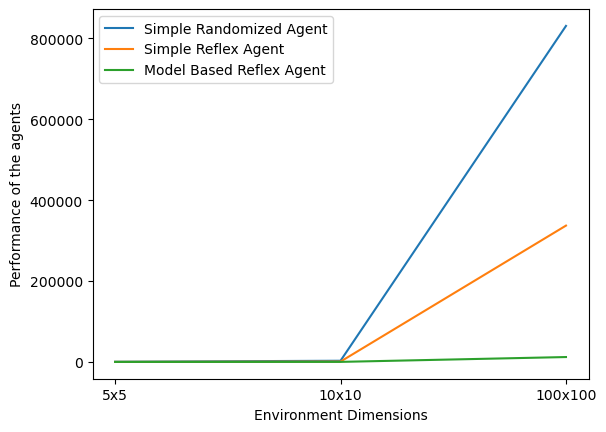

,Size,Simple Randomized Agent,Simple Reflex Agent,Model Based Reflex Agent
0,5x5,432.69,101.40,28.35
1,10x10,2935.22,869.22,124.30
2,100x100,830867.55,337124.63,12093.64


In [37]:
import matplotlib.pyplot as plt
plt.plot(myDF["Size"], myDF["Simple Randomized Agent"], label = "Simple Randomized Agent")
plt.plot(myDF["Size"], myDF["Simple Reflex Agent"], label = "Simple Reflex Agent")
plt.plot(myDF["Size"], myDF["Model Based Reflex Agent"], label = "Model Based Reflex Agent")
plt.xlabel("Environment Dimensions")
plt.ylabel("Performance of the agents")
plt.legend()
plt.show()

myDF

##### This graph displays the relationship between each model and the time it took each to run based off of their respective sizes. Through this graph it can be easily seen that the Modal based agent is easily the most efficient in completing the task of cleaning the environment and the simple randomized agent was the least efficient.

## Task 5: Robustness of the agent implementations [10 Points]

Describe how **your agent implementations** will perform

* if it is put into a rectangular room with unknown size,
* if the cleaning area can have an iregular shape (e.g., a hallway connecting two rooms), or
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).

In [15]:
# Answer goes here

##### 
- The agent implementation would still work effectivley in a rectangular room with an unknown size, as the size of the room is not taken as a paramter in the agent function, and the fact that it is squared is not used as a factor in the original environment. The only thing that is used as a necessary given, is the fact that the environment has four right angle corners, which a rectangle has as well.

- The agent implementation would not be able to effectivley function if the room was an irregular shape, as the implementation relies on the fact that the environment will be able to access the top left corner of the environment from purely going up until a "north" bumper is hit, and then going left until a "west" bumper is hit, as well as using this corner as a starting point for snaking through the rest of the environment. Therefore, if the agent is in an environment where there is more than one top-left corner, such as a hallway connecting two rooms, then it would be for the agent to iterate over every space in the environment.

- The agent implementation would not be able to effectivley function if the room contained obstacles either, as the obstacles to turn before hitting the wall of the room in some cases, causing the agent to effectivley miss portions of the room and possibly leave areas uncleaned.

## Graduate student advanced task: Obstacles [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

1. Change your simulation environment tor run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Observe how this changes the performance of the three implementations.

2. Describe what would need to be done to perform better with obstacles. Add code if you can.

###
1. The changes observed were that, for the the simple reflex agent and the modal based reflex agent, there were instances when cleaning the 10x10 and 100x100 where the environment simply never got cleaned. 

2. Assuming that the robot could reach every square in the environment, the primary thing that would need to be done is to have the agent keep track of the number of steps done during one row of the snaking process, and compare it to the next row. As soon as one row has a different length traveled before turning, if it is less than the previous then the agent will investigate what was previously percieved as wall on the current row to see if it is possible to travel past thenm on either side, and if the distance is more than the previous row then the same investigation will be done on the row prior. If there is determined to be an obstacle in the row then the agent will attempt to go around it and adjust the length of the row accordingly.

In [16]:
# Your code and discussion goes here

reached_corner = False 
last_move = "north"

def obstacle_environment(agent, max_steps, size, verbose = True):
    num_steps = 0
    num_dirty = 0
    agent_start_location = (0,0)
    agent_location = (agent_start_location[0], agent_start_location[1])

    #create the environment
    grid = np.zeros((size,size))
    for i in range(size):
        for j in range(size):
            randNum = np.random.random()
            if randNum < 0.2:
                grid[i,j] = 1
                num_dirty += 1
            if randNum > 0.8:
                grid[i,j] = 2
    if verbose == True:
        print(grid)
    
    #make start point for agent
    x_start = np.random.randint(0,size)
    y_start = np.random.randint(0,size)
    agent_start_location = (x_start,y_start)
    agent_location = agent_start_location


    for i in range(max_steps):

        #send agent drity square information
        if grid[agent_location[0], agent_location[1]] == 1:
            dirty = True
        else:
            dirty = False
        
        #send agent bumpers information
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}
        if verbose == True:
            print(agent_location)
        if agent_location[0] == 0:
            bumpers["north"] = True
        if agent_location[0] == size-1:
            bumpers["south"] = True
        if agent_location[1] == 0:
            bumpers["west"] = True
        if agent_location[1] == size-1:
            bumpers["east"] = True

        #send agent barrier information regarding bumpers 
        if bumpers["north"] == False:
            if grid[agent_location[0]-1, agent_location[1]] == 2:
                bumpers["north"] = True
        if bumpers["south"] == False:
            if grid[agent_location[0]+1, agent_location[1]] == 2:
                bumpers["south"] = True
        if bumpers["west"] == False:
            if grid[agent_location[0], agent_location[1]-1] == 2:
                bumpers["west"] = True
        if bumpers["east"] == False:
            if grid[agent_location[0], agent_location[1]+1] == 2:
                bumpers["east"] = True

        #call agent action
        action = agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action)

        #making sure simple random doesn't break
        if action == "north" and bumpers["north"] == True:
            action = "none"
        if action == "south" and bumpers["south"] == True:
            action = "none"
        if action == "east" and bumpers["east"] == True:
            action = "none"
        if action == "west" and bumpers["west"] == True:
            action = "none"


        #counting the steps
        if (action == "north"):
            agent_location = (agent_location[0]-1,agent_location[1])
            num_steps += 1
        if (action == "east"):
            agent_location = (agent_location[0],agent_location[1]+1)
            num_steps += 1
        if (action == "west"):
            agent_location = (agent_location[0],agent_location[1]-1)
            num_steps += 1
        if (action == "south"):
            agent_location = (agent_location[0]+1,agent_location[1])
            num_steps += 1

        if (action == "suck"):
            num_dirty = num_dirty - 1
            num_steps += 1 
            grid[agent_location[0], agent_location[1]] = 0

        if num_dirty == 0:
            break

    if verbose == True:
        print(grid)
    return num_steps



In [17]:
# Simulating with new environment

# making table
df = pd.DataFrame({
    "Size": ["5x5", "10x10", "100x100"],
    "Simple Randomized Agent": np.zeros(3),
    "Simple Reflex Agent": np.zeros(3),
    "Model Based Reflex Agent": np.zeros(3)
})

# testing for each size
#for one_size in all_size:
for one_size in all_size:
    simple_randomized_data = []
    simple_reflex_data = []
    model_based_reflex_data = []
    
    for i in range(5):
        simple_randomized_data.append(obstacle_environment(simple_randomized_agent, max_steps = 10000000, size = one_size, verbose = False))
        simple_reflex_data.append(obstacle_environment(simple_reflex_agent, max_steps = 1000000, size = one_size, verbose = False))

        reached_corner = False 
        last_move = "north" 
        model_based_reflex_data.append(obstacle_environment(model_based_reflex_agent, max_steps = 100000, size = one_size, verbose = False))

    # adding to table
    df.loc[df["Size"] == str(one_size)+"x"+str(one_size), "Simple Randomized Agent"] = np.mean(simple_randomized_data)
    df.loc[df["Size"] == str(one_size)+"x"+str(one_size), "Simple Reflex Agent"] = np.mean(simple_reflex_data)
    df.loc[df["Size"] == str(one_size)+"x"+str(one_size), "Model Based Reflex Agent"] = np.mean(model_based_reflex_data)

df

,Size,Simple Randomized Agent,Simple Reflex Agent,Model Based Reflex Agent
0,5x5,14.8,98.6,25004.8
1,10x10,75.6,200919.8,54509.0
2,100x100,8402.0,1000000.0,16055.2


### Same model but returning number of spaces left dirty

In [18]:
reached_corner = False 
last_move = "north"

def obstacle_environment_dirty(agent, max_steps, size, verbose = True):
    num_steps = 0
    num_dirty = 0
    agent_start_location = (0,0)
    agent_location = (agent_start_location[0], agent_start_location[1])

    #create the environment
    grid = np.zeros((size,size))
    for i in range(size):
        for j in range(size):
            randNum = np.random.random()
            if randNum < 0.2:
                grid[i,j] = 1
                num_dirty += 1
            if randNum > 0.8:
                grid[i,j] = 2
    if verbose == True:
        print(grid)
    
    #make start point for agent
    x_start = np.random.randint(0,size)
    y_start = np.random.randint(0,size)
    agent_start_location = (x_start,y_start)
    agent_location = agent_start_location


    for i in range(max_steps):

        #send agent drity square information
        if grid[agent_location[0], agent_location[1]] == 1:
            dirty = True
        else:
            dirty = False
        
        #send agent bumpers information
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}
        if verbose == True:
            print(agent_location)
        if agent_location[0] == 0:
            bumpers["north"] = True
        if agent_location[0] == size-1:
            bumpers["south"] = True
        if agent_location[1] == 0:
            bumpers["west"] = True
        if agent_location[1] == size-1:
            bumpers["east"] = True

        #send agent barrier information regarding bumpers 
        if bumpers["north"] == False:
            if grid[agent_location[0]-1, agent_location[1]] == 2:
                bumpers["north"] = True
        if bumpers["south"] == False:
            if grid[agent_location[0]+1, agent_location[1]] == 2:
                bumpers["south"] = True
        if bumpers["west"] == False:
            if grid[agent_location[0], agent_location[1]-1] == 2:
                bumpers["west"] = True
        if bumpers["east"] == False:
            if grid[agent_location[0], agent_location[1]+1] == 2:
                bumpers["east"] = True

        #call agent action
        action = agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action)

        #making sure simple random doesn't break
        if action == "north" and bumpers["north"] == True:
            action = "none"
        if action == "south" and bumpers["south"] == True:
            action = "none"
        if action == "east" and bumpers["east"] == True:
            action = "none"
        if action == "west" and bumpers["west"] == True:
            action = "none"


        #counting the steps
        if (action == "north"):
            agent_location = (agent_location[0]-1,agent_location[1])
            num_steps += 1
        if (action == "east"):
            agent_location = (agent_location[0],agent_location[1]+1)
            num_steps += 1
        if (action == "west"):
            agent_location = (agent_location[0],agent_location[1]-1)
            num_steps += 1
        if (action == "south"):
            agent_location = (agent_location[0]+1,agent_location[1])
            num_steps += 1

        if (action == "suck"):
            num_dirty = num_dirty - 1
            num_steps += 1 
            grid[agent_location[0], agent_location[1]] = 0

        if num_dirty == 0:
            break

    if verbose == True:
        print(grid)
    return num_dirty

In [19]:
# Simulating with new environment while returning how many spots were left dirty

# making table
df = pd.DataFrame({
    "Size": ["5x5", "10x10", "100x100"],
    "Simple Randomized Agent": np.zeros(3),
    "Simple Reflex Agent": np.zeros(3),
    "Model Based Reflex Agent": np.zeros(3)
})

# testing for each size
#for one_size in all_size:
for one_size in all_size:
    simple_randomized_data = []
    simple_reflex_data = []
    model_based_reflex_data = []
    
    for i in range(1):
        simple_randomized_data.append(obstacle_environment_dirty(simple_randomized_agent, max_steps = 10000000, size = one_size, verbose = False))
        simple_reflex_data.append(obstacle_environment_dirty(simple_reflex_agent, max_steps = 1000000, size = one_size, verbose = False))

        reached_corner = False 
        last_move = "north" 
        model_based_reflex_data.append(obstacle_environment_dirty(model_based_reflex_agent, max_steps = 100000, size = one_size, verbose = False))

    # adding to table
    df.loc[df["Size"] == str(one_size)+"x"+str(one_size), "Simple Randomized Agent"] = np.mean(simple_randomized_data)
    df.loc[df["Size"] == str(one_size)+"x"+str(one_size), "Simple Reflex Agent"] = np.mean(simple_reflex_data)
    df.loc[df["Size"] == str(one_size)+"x"+str(one_size), "Model Based Reflex Agent"] = np.mean(model_based_reflex_data)

df

,Size,Simple Randomized Agent,Simple Reflex Agent,Model Based Reflex Agent
0,5x5,0.0,0.0,2.0
1,10x10,0.0,0.0,16.0
2,100x100,0.0,6.0,1996.0


## More advanced implementation tasks

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actualy depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currebntly clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [20]:
# Your ideas/code